In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramaterised isoscalar/isovector coefficients

S00_129 = np.array([0.0547144,-0.146407,0.180603,-0.125526,0.0521484,-0.0126363,0.00176284,-0.000132501,0.00000423423,-0.00000000168052])

S11_min_129 = np.array([0.0221559,-0.06561,0.086392,-0.0631729,0.0278792,-0.00756661,0.00126767,-0.000127755,0.00000710322,-0.000000167272])

S11_max_129 = np.array([0.0357742,-0.107895,0.145055,-0.108549,0.0490401,-0.0136169,0.00233283,-0.000239926,0.0000135553,-0.000000321404])

S01_min_129 = np.array([-0.0885644,0.254049,-0.332322,0.244981,-0.109298,0.0296705,-0.00492657,0.000488467,-0.0000265022,0.000000598909])

S01_max_129 = np.array([-0.0696691,0.19738,-0.254839,0.185896,-0.0825294,0.0224322,-0.00375109,0.000377179,-0.000020951,0.000000492362])

In [2]:
S00_131 = np.array([0.0417857,-0.111132,0.171306,-0.132481,0.0630161,-0.0177684,0.00282192,-0.000232247,0.00000781471,0.00000000125984])

S11_min_131 = np.array([0.0167361,-0.0472853,0.0684924,-0.0514413,0.0237858,-0.00692778,0.0012437,-0.000131617,0.00000746669,-0.000000173484])

S11_max_131 = np.array([0.0271052,-0.0812985,0.12296,-0.0940491,0.0439746,-0.0128013,0.00227407,-0.000235642,0.0000128691,-0.000000277011])

S01_min_131 = np.array([-0.0675438,0.19571,-0.306688,0.243678,-0.118395,0.0351428,-0.00622577,0.000631685,-0.0000333272,0.0000006825])

S01_max_131 = np.array([-0.0529487,0.146987,-0.225003,0.179499,-0.0888278,0.0271514,-0.0049928,0.000531148,-0.0000299162,0.000000681902])

In [3]:
# Compute coefficients for proton/neutron based on definition

Sp_129_min = S00_129 + S01_min_129 + S11_min_129
Sp_129_max = S00_129 + S01_max_129 + S11_max_129

Sn_129_min = S00_129 - S01_min_129 + S11_min_129
Sn_129_max = S00_129 - S01_max_129 + S11_max_129

# Sn_129_min = S00_129 - S01_max_129 + S11_min_129
# Sn_129_max = S00_129 - S01_min_129 + S11_max_129

Sp_131_min = S00_131 + S01_min_131 + S11_min_131
Sp_131_max = S00_131 + S01_max_131 + S11_max_131

Sn_131_min = S00_131 - S01_min_131 + S11_min_131
Sn_131_max = S00_131 - S01_max_131 + S11_max_131

# Sn_131_min = S00_131 - S01_max_131 + S11_min_131
# Sn_131_max = S00_131 - S01_min_131 + S11_max_131

# Note: This is the 'incorrect' way to get the bands for Sn but leads to the same result when interpolating

In [4]:
# Paramaterised proton/neutron coefficients

Sp_129_min_paper = np.array([0.00196369,-0.00119154,-0.0032421,0.00622602,-0.00496653,0.00224469,-0.000574412,0.0000831313,-0.00000641114,0.000000207744])
Sp_129_max_paper = np.array([0.00715281,-0.013479,0.00788823,0.00311153,-0.00653771,0.00375478,-0.00105558,0.00015944,-0.0000125055,0.000000404987])

Sn_129_min_paper = np.array([0.146535,-0.40929,0.521423,-0.374011,0.162155,-0.0424842,0.00674911,-0.000633434,0.0000320266,-0.000000654245])
Sn_129_max_paper = np.array([0.179056,-0.508334,0.65756,-0.477988,0.209437,-0.0554186,0.00889251,-0.000842977,0.0000430517,-0.000000888774])

Sp_131_min_paper = np.array([0.00159352,-0.00207344,0.00567412,-0.00605643,0.00337794,-0.000688135,-0.0000342717,0.0000313222,-0.00000402617,0.000000172711])
Sp_131_max_paper = np.array([0.00529643,-0.00528808,-0.00627452,0.0227436,-0.0192229,0.00844826,-0.00212755,0.000303972,-0.0000227893,0.000000705661])

Sn_131_min_paper = np.array([0.111627,-0.308602,0.474842,-0.375201,0.182382,-0.0539711,0.0094418,-0.000934456,0.0000473386,-0.000000901514])
Sn_131_max_paper = np.array([0.136735,-0.39393,0.617924,-0.488443,0.234645,-0.0681357,0.0116393,-0.00111487,0.0000534878,-0.000000903594])

In [5]:
umin = 0
umax = 2

u_eval = np.arange(umin,umax,0.01)

In [6]:
# Polynomial definition

def S_Function(u, par):
    poly = 0
    parlength = len(par)
    for index in range(parlength):
        poly = poly + np.exp(-u) * par[index] * pow(u, index)
    return poly

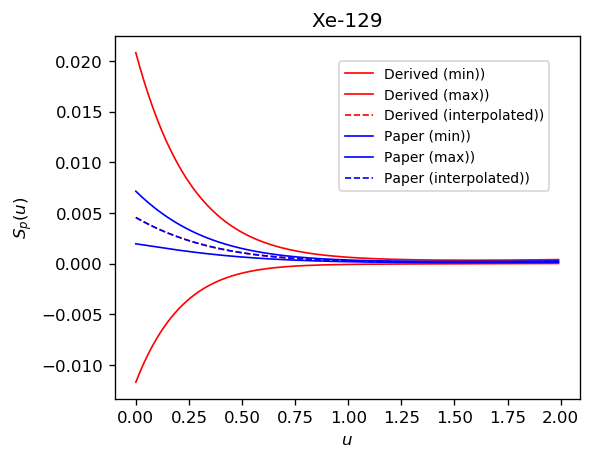

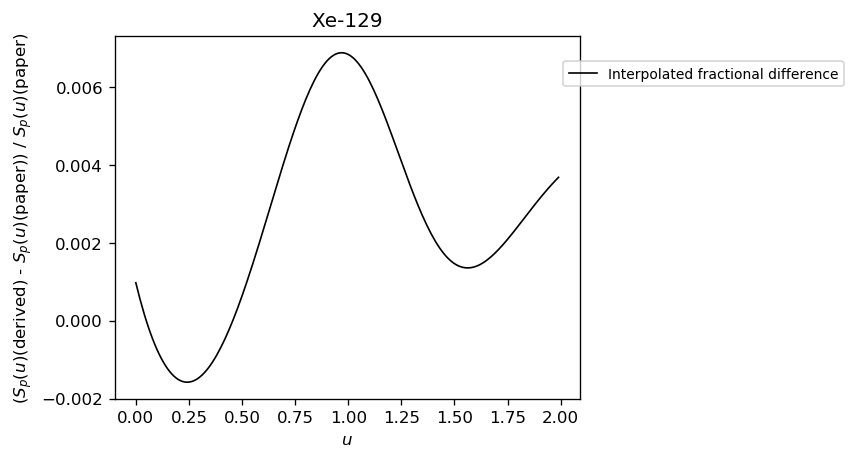

In [7]:
# Evaluate function for proton/neutron case using coefficients derived from isoscalar/isovector coefficeints

Sfn_p_129_min = S_Function(u_eval, Sp_129_min)
Sfn_p_129_max = S_Function(u_eval, Sp_129_max)
Sfn_p_129_interp = S_Function(u_eval, 0.5*(Sp_129_min+Sp_129_max))

# Evaluate function for proton/neutron case using coefficients directly from paper

Sfn_p_129_min_paper = S_Function(u_eval, Sp_129_min_paper)
Sfn_p_129_max_paper = S_Function(u_eval, Sp_129_max_paper)
Sfn_p_129_interp_paper = S_Function(u_eval, 0.5*(Sp_129_min_paper+Sp_129_max_paper))

frac_diff = (Sfn_p_129_interp - Sfn_p_129_interp_paper)/Sfn_p_129_interp_paper

fig1 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('$S_{p}(u)$')
plt.title('Xe-129')

plt.plot(u_eval, Sfn_p_129_min, '-r', lw=1, label='Derived (min))')
plt.plot(u_eval, Sfn_p_129_max, '-r', lw=1, label='Derived (max))')
plt.plot(u_eval, Sfn_p_129_interp, '--r', lw=1, label='Derived (interpolated))')

plt.plot(u_eval, Sfn_p_129_min_paper, '-b', lw=1, label='Paper (min))')
plt.plot(u_eval, Sfn_p_129_max_paper, '-b', lw=1, label='Paper (max))')
plt.plot(u_eval, Sfn_p_129_interp_paper, '--b', lw=1, label='Paper (interpolated))')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

fig2 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{p}(u)$(derived) - $S_{p}(u)$(paper)) / $S_{p}(u)$(paper)')
plt.title('Xe-129')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

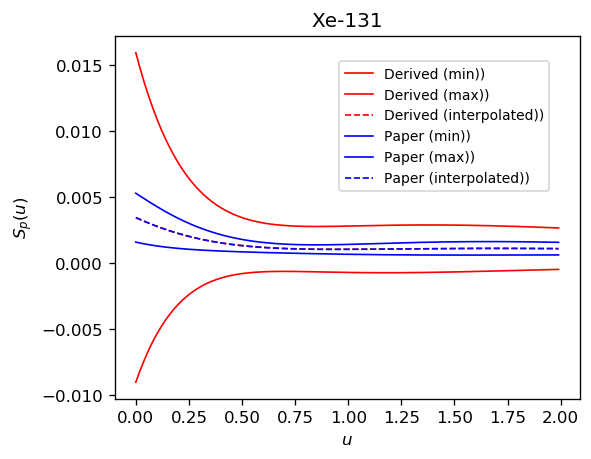

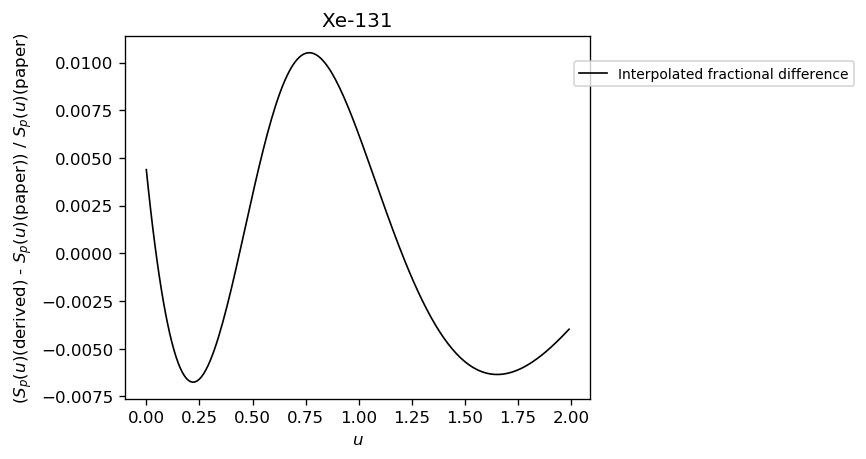

In [8]:
Sfn_p_131_min = S_Function(u_eval, Sp_131_min)
Sfn_p_131_max = S_Function(u_eval, Sp_131_max)
Sfn_p_131_interp = S_Function(u_eval, 0.5*(Sp_131_min+Sp_131_max))

Sfn_p_131_min_paper = S_Function(u_eval, Sp_131_min_paper)
Sfn_p_131_max_paper = S_Function(u_eval, Sp_131_max_paper)
Sfn_p_131_interp_paper = S_Function(u_eval, 0.5*(Sp_131_min_paper+Sp_131_max_paper))

frac_diff = (Sfn_p_131_interp - Sfn_p_131_interp_paper)/Sfn_p_131_interp_paper

fig3 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('$S_{p}(u)$')
plt.title('Xe-131')

plt.plot(u_eval, Sfn_p_131_min, '-r', lw=1, label='Derived (min))')
plt.plot(u_eval, Sfn_p_131_max, '-r', lw=1, label='Derived (max))')
plt.plot(u_eval, Sfn_p_131_interp, '--r', lw=1, label='Derived (interpolated))')

plt.plot(u_eval, Sfn_p_131_min_paper, '-b', lw=1, label='Paper (min))')
plt.plot(u_eval, Sfn_p_131_max_paper, '-b', lw=1, label='Paper (max))')
plt.plot(u_eval, Sfn_p_131_interp_paper, '--b', lw=1, label='Paper (interpolated))')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

fig4 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{p}(u)$(derived) - $S_{p}(u)$(paper)) / $S_{p}(u)$(paper)')
plt.title('Xe-131')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

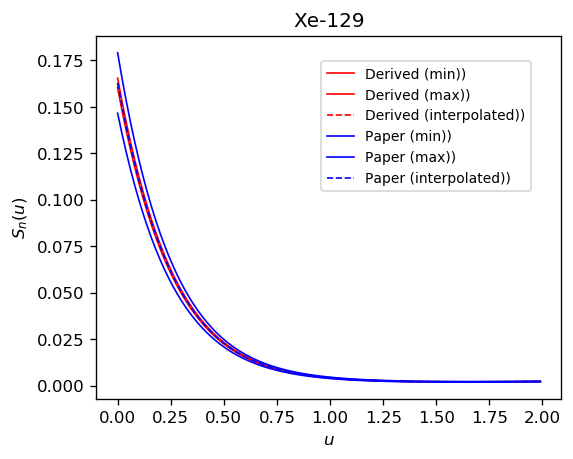

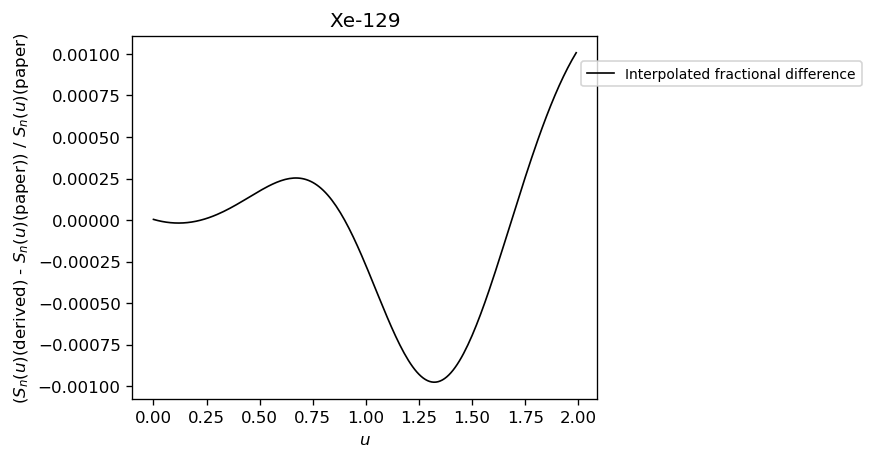

In [9]:
Sfn_n_129_min = S_Function(u_eval, Sn_129_min)
Sfn_n_129_max = S_Function(u_eval, Sn_129_max)
Sfn_n_129_interp = S_Function(u_eval, 0.5*(Sn_129_min+Sn_129_max))

Sfn_n_129_min_paper = S_Function(u_eval, Sn_129_min_paper)
Sfn_n_129_max_paper = S_Function(u_eval, Sn_129_max_paper)
Sfn_n_129_interp_paper = S_Function(u_eval, 0.5*(Sn_129_min_paper+Sn_129_max_paper))

frac_diff = (Sfn_n_129_interp - Sfn_n_129_interp_paper)/Sfn_n_129_interp_paper

fig5 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('$S_{n}(u)$')
plt.title('Xe-129')

plt.plot(u_eval, Sfn_n_129_min, '-r', lw=1, label='Derived (min))')
plt.plot(u_eval, Sfn_n_129_max, '-r', lw=1, label='Derived (max))')
plt.plot(u_eval, Sfn_n_129_interp, '--r', lw=1, label='Derived (interpolated))')

plt.plot(u_eval, Sfn_n_129_min_paper, '-b', lw=1, label='Paper (min))')
plt.plot(u_eval, Sfn_n_129_max_paper, '-b', lw=1, label='Paper (max))')
plt.plot(u_eval, Sfn_n_129_interp_paper, '--b', lw=1, label='Paper (interpolated))')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

fig6 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{n}(u)$(derived) - $S_{n}(u)$(paper)) / $S_{n}(u)$(paper)')
plt.title('Xe-129')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

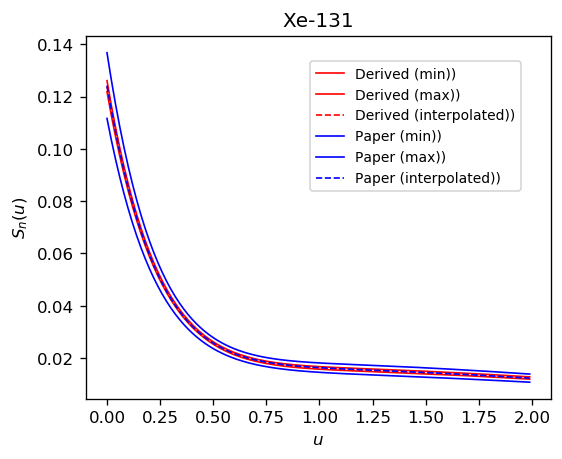

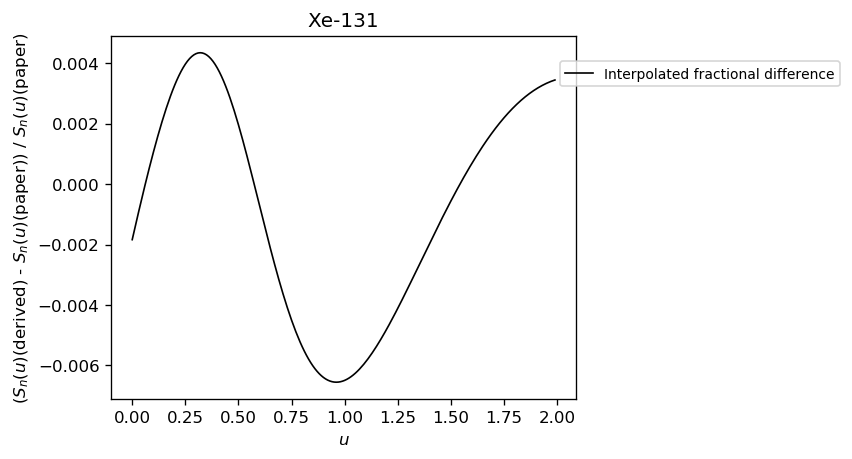

In [10]:
Sfn_n_131_min = S_Function(u_eval, Sn_131_min)
Sfn_n_131_max = S_Function(u_eval, Sn_131_max)
Sfn_n_131_interp = S_Function(u_eval, 0.5*(Sn_131_min+Sn_131_max))

Sfn_n_131_min_paper = S_Function(u_eval, Sn_131_min_paper)
Sfn_n_131_max_paper = S_Function(u_eval, Sn_131_max_paper)
Sfn_n_131_interp_paper = S_Function(u_eval, 0.5*(Sn_131_min_paper+Sn_131_max_paper))

frac_diff = (Sfn_n_131_interp - Sfn_n_131_interp_paper)/Sfn_n_131_interp_paper

fig7 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('$S_{n}(u)$')
plt.title('Xe-131')

plt.plot(u_eval, Sfn_n_131_min, '-r', lw=1, label='Derived (min))')
plt.plot(u_eval, Sfn_n_131_max, '-r', lw=1, label='Derived (max))')
plt.plot(u_eval, Sfn_n_131_interp, '--r', lw=1, label='Derived (interpolated))')

plt.plot(u_eval, Sfn_n_131_min_paper, '-b', lw=1, label='Paper (min))')
plt.plot(u_eval, Sfn_n_131_max_paper, '-b', lw=1, label='Paper (max))')
plt.plot(u_eval, Sfn_n_131_interp_paper, '--b', lw=1, label='Paper (interpolated))')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')

fig8 = plt.figure(dpi=120,figsize=(5,4))
plt.xlabel('$u$')
plt.ylabel('($S_{n}(u)$(derived) - $S_{n}(u)$(paper)) / $S_{n}(u)$(paper)')
plt.title('Xe-131')

plt.plot(u_eval, frac_diff, '-k', lw=1, label='Interpolated fractional difference')

plt.legend(bbox_to_anchor=(0.95, 0.95), fontsize='small')